In [1]:
import scanpy as sc
import scvelo as scv
import pandas as pd
import numpy as np
import pickle
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
"""# Initialize dictionaries to hold data
confidences = {}

# Define paths
path = "../../outputs_old/final_anndatas/pancreas"
mivelo_path = f"{path}/miVelo_K10_DT.h5ad"
celldancer_path = f"{path}/celldancer.h5ad"
baseline_path = f"{path}/baseline.h5ad"
scvelo_path = f"{path}/scvelo.h5ad"
stochastic_path = f"{path}/stochastic.h5ad"
ivelo_noproc_path = f"{path}/ivelo_noproc.h5ad"
ivelo_proc_path = f"{path}/ivelo_proc.h5ad"
velovi_noproc_path = f"{path}/velovi_noproc.h5ad"
velovi_proc_path = f"{path}/velovi_proc.h5ad"
manifold_path = f"{path}/manifold.h5ad"
paths = [mivelo_path, scvelo_path, stochastic_path, celldancer_path, velovi_noproc_path, ivelo_noproc_path,
         velovi_proc_path, ivelo_proc_path, baseline_path]
names = ["mivelo", "scvelo", "steadystate_stochastic", "celldancer", "velovi_noproc", "ivelo_noproc", "velovi_proc", 
         "ivelo_proc", "baseline"]

# Load data and extract velocity confidence
for i, path in enumerate(paths):
    print(f"path: {path}")
    confidences[f"{names[i]}"] = sc.read_h5ad(path).obs["velocity_confidence"]

with open('confidences.pkl', 'wb') as f:
    pickle.dump(confidences, f)"""

In [2]:
with open('confidences.pkl', 'rb') as handle:
    confidences = pickle.load(handle)

In [9]:
for model, confidence in confidences.items():
    print(model)
    print(confidence.values)


mivelo
[0.         0.81745385 0.81011527 ... 0.67027077 0.63506957 0.95997112]
scvelo
[0.92385802 0.80572202 0.81363061 ... 0.76475464 0.77848828 0.68953511]
steadystate_stochastic
[0.79106003 0.89210701 0.77342904 ... 0.81798351 0.84821969 0.83041257]
celldancer
[0.72685443 0.74031707 0.90530556 ... 0.72158776 0.37678365 0.93397981]
velovi_noproc
[0.97515887 0.94149077 0.95351881 ... 0.93227774 0.97402555 0.9731127 ]
ivelo_noproc
[0.97830075 0.95037699 0.98008567 ... 0.90036523 0.94174427 0.97651523]
velovi_proc
[0.86601627 0.90644473 0.88330394 ... 0.83783948 0.91288704 0.85548753]
ivelo_proc
[0.90825719 0.90801555 0.90058941 ... 0.89259058 0.9255479  0.90546054]
baseline
[0.73399417 0.93593526 1.         ... 0.90390289 1.         0.85970705]


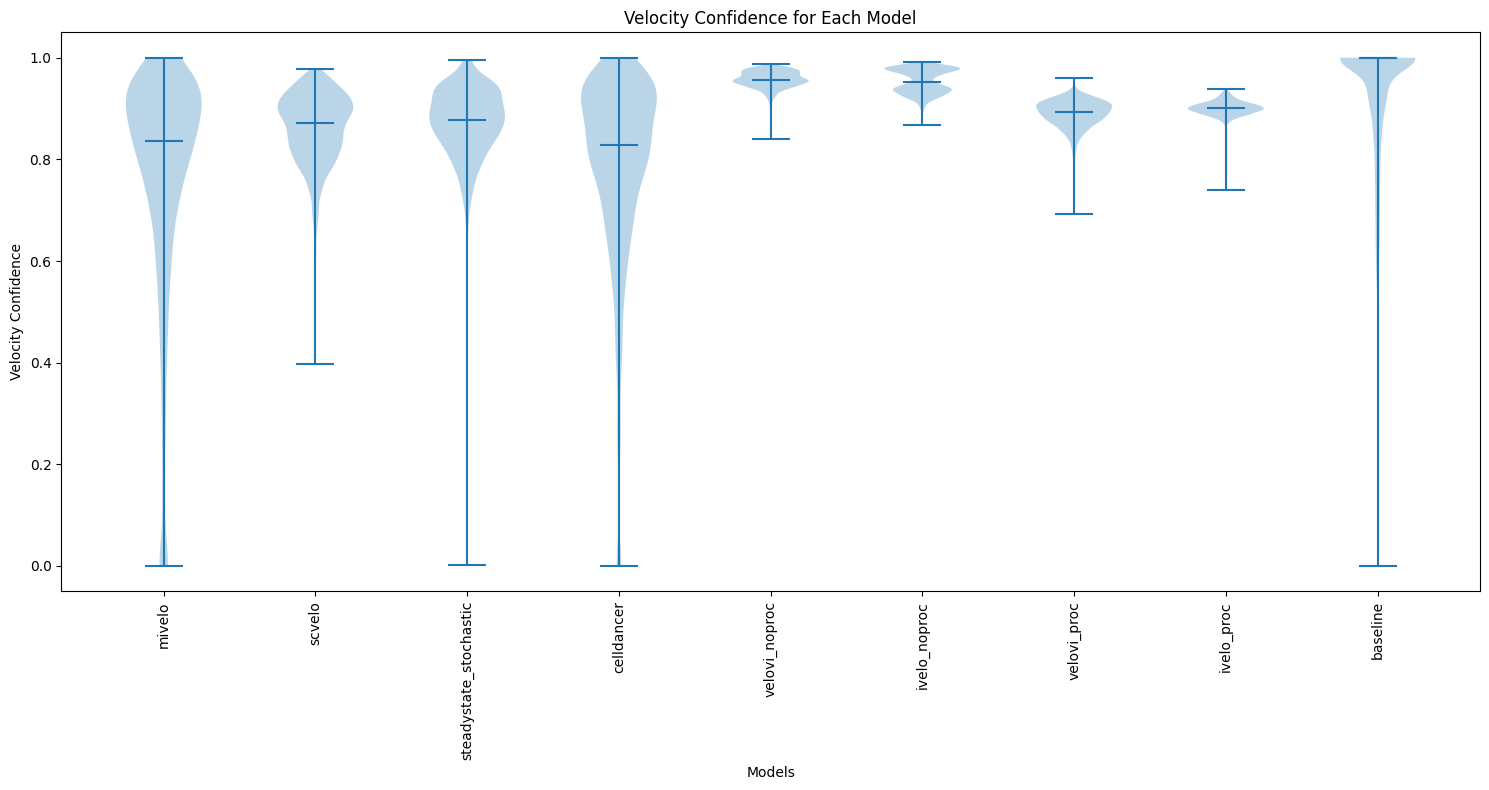

In [2]:
import pickle
import matplotlib.pyplot as plt

# Load the data
with open('confidences.pkl', 'rb') as handle:
    confidences = pickle.load(handle)

# Models to plot
names = ["mivelo", "scvelo", "steadystate_stochastic", "celldancer", "velovi_noproc", "ivelo_noproc", "velovi_proc", 
         "ivelo_proc", "baseline"]

# Prepare data for plotting
all_confidences = []
all_labels = []

for model in names:
    if model in confidences:
        all_confidences.append(confidences[model])
        all_labels.append(model)

# Create the violin plot
fig, ax = plt.subplots(figsize=(15, 8))
ax.violinplot(all_confidences, showmeans=False, showmedians=True)

# Set x-ticks and labels
ax.set_xticks(range(1, len(all_labels) + 1))
ax.set_xticklabels(all_labels, rotation=90)

ax.set_title('Velocity Confidence for Each Model')
ax.set_xlabel('Models')
ax.set_ylabel('Velocity Confidence')

plt.savefig("confidences.png", bbox_inches="tight")
plt.show()
